### Library Imports

In [1]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn #as sns
from sklearn import preprocessing, svm, datasets
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
# from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as pyplot
plt = pyplot
import itertools

# Task 1
### Reading the CSV file.
### Constructing a correlation matrix.
### Filtering companies with less than 0.95 correlation.

In [2]:

# read the CSV file
df = pd.read_csv("sp500_27270.csv")
print("Done: reading the CSV.")


# Construct a correlation matrix
correlation = df.corr().abs()
# Filter companies with less than 0.95 correlation
correlation = correlation[correlation >= 0.95] #output
# print(correlation)
print("Done: constructing the correlation matrix and filtering >= 0.95")


# filter the table and keep the most correlated companies only
print(correlation.index)
filteredDF = df.filter(items=correlation.index)
SP500 = filteredDF["SP500"]
filteredDF = filteredDF.drop(axis=1, labels="SP500") # remove the index itself
print("Done: keeping most correlated companies")



Done: reading the CSV.
Done: constructing the correlation matrix and filtering >= 0.95
Index(['Unnamed: 0', 'SP500', 'MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI',
       'ADBE', 'AMD',
       ...
       'WMB', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XYL', 'YUM', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=388)
Done: keeping most correlated companies


### Normalizing the data.
### Splitting the data into training and testing sets.

In [3]:
# keeping the mean and the SD of the SP500 in order to use them for denormalization later.
spMean = SP500.mean()
spSD = SP500.std()
# normalizedSP500 = (SP500 - spMean) / spSD
# print(normalizedSP500)
normalizedSP500 = preprocessing.scale(SP500)
for column in filteredDF:
    filteredDF[column] = preprocessing.scale(filteredDF[column])
normalizedDF = filteredDF

print("Done: Normalizing.")



# Decide on the ratios of the tests
# say 0.7 training, 0.2 testing
trainingRatio = 0.8
testingRatio = 0.2
X_train,X_test,Y_train,Y_test = train_test_split(normalizedDF,normalizedSP500,test_size=0.2,random_state=1)
print(X_train)
print("Done: deciding on the ratios and splitting the values.")


TypeError: iteration over a 0-d array

### We will use the mean square error as a scoring metric.
### Reason: the problem is a linear regression problem.

### Function to use MLPRegressor, provide it with parameters and plot the results.

In [4]:
def DoLinearRegression(solverInput, learning_rate_initInput, early_stopping,
                       x_train, y_train, x_test, y_test,
                       targetMean, targetSD):
    reg = MLPRegressor(
        hidden_layer_sizes=(5,),
        activation='relu',
        solver=solverInput,
        learning_rate='adaptive',
        max_iter=1000,
        learning_rate_init=learning_rate_initInput,
        alpha=0.01,
        early_stopping=early_stopping
    )

    reg.fit(x_train,y_train)
    print(reg)
    h = reg.predict(x_test)

    # denormalization
    deNorh = (h * targetSD) + targetMean
    deNorY_test = (y_test * targetSD) + targetMean

    fig = pyplot.figure()
    ax = fig.add_axes([0.1,0.1,0.8,0.8])

    ax.plot(deNorh,label='h(x)',color='blue',ls='-')
    ax.plot(deNorY_test,label="Y_test",color='red',ls='--')

    # difference = abs(h - Y_test)
    # ax.plot(difference,label='error',color='red',ls='-')

    # ax.plot([-2,-1,0,1,2],Y_test[0:limit],label='y_test',color='green',ls='--')
    # ax.plot(x,z,label='z',color='blue',ls='-.')

    pyplot.show()

In [5]:
DoLinearRegression('adam',0.01, True, X_train, Y_train, X_test, Y_test, spMean, spSD)

NameError: name 'X_train' is not defined

In [6]:
DoLinearRegression('adam', 0.05, True, X_train, Y_train, X_test, Y_test, spMean, spSD)

NameError: name 'X_train' is not defined

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.1, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


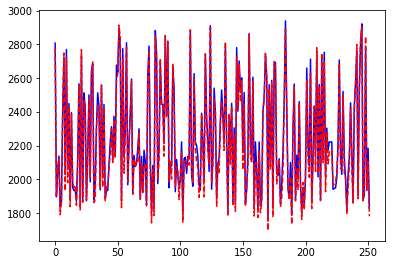

In [486]:
DoLinearRegression('adam', 0.1, True, X_train, Y_train, X_test, Y_test, spMean, spSD)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


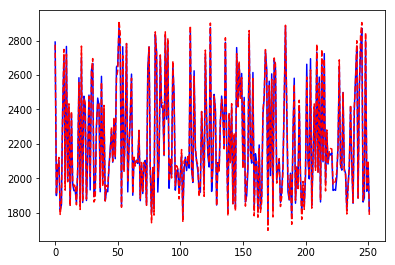

In [487]:
DoLinearRegression('sgd', 0.01, True, X_train, Y_train, X_test, Y_test, spMean, spSD)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.005, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


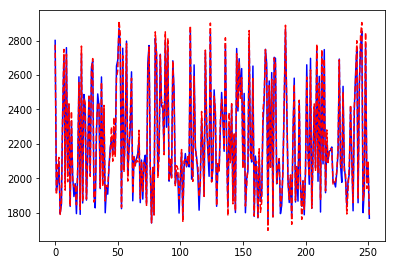

In [488]:
DoLinearRegression('sgd', 0.005, True, X_train, Y_train, X_test, Y_test, spMean, spSD)

# Task 2
### The most correlated stock is APH with a score of 0.988361
### We can also use the mean square error as a scoring metric because this problem is also a linear regression problem.

In [38]:
# print(df)
# print(SP500)
mostCorrelatedStock = df["APH"]
mcs = mostCorrelatedStock
# print(mostCorrelatedStock)

# normalizedY = preprocessing.scale(SP500)
# normalizedX = preprocessing.scale(mostCorrelatedStock)


X_arrays = []
Y_arrays = []

for i in range(4, mcs.shape[0]-4):
    X_arrays.append([mcs.iloc[i-4], mcs.iloc[i-3], mcs.iloc[i-2], mcs.iloc[i-1], mcs.iloc[i]])
    Y_arrays.append([mcs.iloc[i+1], mcs.iloc[i+2], mcs.iloc[i+3], mcs.iloc[i+4]])
    
# XnorMean = X_arrays.mean()
# XnorSTD = X_arrays.std()
Xnor = preprocessing.scale(X_arrays)
Ynor = preprocessing.scale(Y_arrays)

trainingRatio = 0.8
testingRatio = 0.2
X_train,X_test,Y_train,Y_test = train_test_split(Xnor, Ynor, test_size=0.2, random_state=1)

In [47]:
def TrainLinearRegressionNoNorm(solverInput, learning_rate_initInput, early_stopping,
                       x_train, y_train, x_test, y_test):
    reg = MLPRegressor(
        hidden_layer_sizes=(5,),
        activation='relu',
        solver=solverInput,
        learning_rate='adaptive',
        max_iter=1000,
        learning_rate_init=learning_rate_initInput,
        alpha=0.01,
        early_stopping=early_stopping
    )

    reg.fit(x_train,y_train)
    print(reg)
    
    return reg

    # denormalization
#     deNorh = (h * targetSD) + targetMean
#     deNorY_test = (y_test * targetSD) + targetMean

#     fig = pyplot.figure()
#     ax = fig.add_axes([0.1,0.1,0.8,0.8])

#     ax.plot(h,label='h(x)',color='blue',ls='-')
#     ax.plot(Y_test,label="Y_test",color='red',ls='--')

#     # difference = abs(h - Y_test)
#     # ax.plot(difference,label='error',color='red',ls='-')

#     # ax.plot([-2,-1,0,1,2],Y_test[0:limit],label='y_test',color='green',ls='--')
#     # ax.plot(x,z,label='z',color='blue',ls='-.')

#     pyplot.show()

In [48]:
regressionObject = TrainLinearRegressionNoNorm('adam',0.01, True, X_train_arrays, Y_train_arrays, X_test, Y_test) #, XnorMean, XnorSTD)



# random1 = np.random.randint(0,X_test.shape[0])
# random2 = np.random.randint(0,X_test.shape[0])
# random3 = np.random.randint(0,X_test.shape[0])
# randomValues = [random1, random2, random3]

# threeValuesX = np.array([X_test[random1],X_test[random2],X_test[random3]])
# # print(threeValuesX)
# # print(X_test[random1])
# # threeValuesX = threeValuesX.append(X_test[random1])
# # threeValuesX = threeValuesX.append(X_test[random2])
# # threeValuesX = threeValuesX.append(X_test[random3])
# # print(threeValues)



# threeValuesY = np.array([Y_test[random1],Y_test[random2],Y_test[random3]])


# # print(X_test)
# # print(threeValuesX)
# # print(type(X_test))
# # print(type(threeValuesX))
# DoLinearRegression('sgd', 0.005, True, X_train, Y_train, threeValuesX, threeValuesY)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


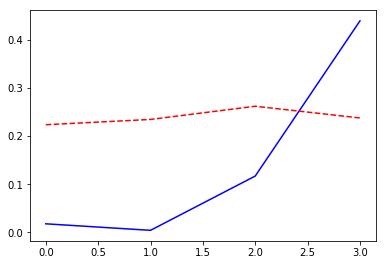

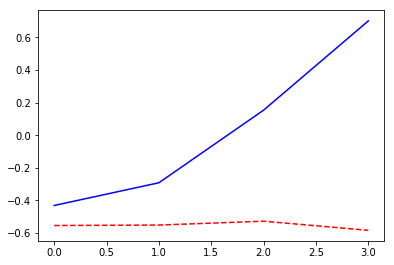

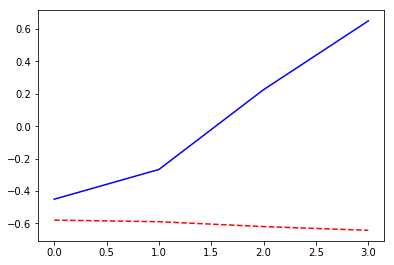

In [51]:
random1 = np.random.randint(0,X_test.shape[0])
random2 = np.random.randint(0,X_test.shape[0])
random3 = np.random.randint(0,X_test.shape[0])

arr1X = X_test[random1]
arr2X = X_test[random2]
arr3X = X_test[random3]

arr1Y = Y_test[random1]
arr2Y = Y_test[random2]
arr3Y = Y_test[random3]

testX = [arr1X, arr2X, arr3X]
testY = [arr1Y, arr2Y, arr3Y]

h = regressionObject.predict(testX)


for i in range(3):
    fig = pyplot.figure()
    ax = fig.add_axes([0.1,0.1,0.8,0.8])

    ax.plot(h[i],label='h(x)',color='blue',ls='-')
    ax.plot(testY[i],label="Y_test",color='red',ls='--')

    pyplot.show()

# Task 3

### Importing the JSON file into a DataFrame.

### Counting the ratings.

In [61]:
reviewsFile = pd.read_json(path_or_buf="reviews_Digital_Music_5.json", lines=True)


print(len(reviewsFile.query('overall==1')))
print(len(reviewsFile.query('overall==2')))
print(len(reviewsFile.query('overall==3')))
print(len(reviewsFile.query('overall==4')))
print(len(reviewsFile.query('overall==5')))


2791
3010
6789
16536
35580


### Selecting 2500 rows from each rating and re-joining them.

### Extracting the feature and the target.

In [62]:
# Select 2500 rows:
rating1 = reviewsFile.query('overall==1')[0:2500].dropna(how='all')
rating2 = reviewsFile.query('overall==2')[0:2500].dropna(how='all')
rating3 = reviewsFile.query('overall==3')[0:2500].dropna(how='all')
rating4 = reviewsFile.query('overall==4')[0:2500].dropna(how='all')
rating5 = reviewsFile.query('overall==5')[0:2500].dropna(how='all')

rejoined = pd.concat([rating1, rating2, rating3, rating4, rating5], axis=0)

features = rejoined['reviewText']
target = rejoined['overall']

### Splitting the data into training and testing.

### Using the TfidfVectorizer to convert the features to numbers.

In [63]:
#splitting to training and testing
trainingRatio = 0.8
testingRatio = 0.2
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.2,random_state=1)


# using the TFIDFvectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=40000)
# print(X_train[0])
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

print(type(X_train_transformed))
print(X_train_transformed.shape)


### Some context on the TfidVectorizer and text handing in sklearn
# * To represent a review to a neural network, each word has to be expressed as a number. 
# * Each word in the review corpus is assigned a unique number. Assume the total number of unique words is feature_count. 
# * Each review can then be represented as a vector of length feature_count. 
# * Entries in this vector can be either 0 or 1, if the word is present in this review or absent respectively. 
# * A more advanced approach will replace the binary numbers above with ratios that emphaise how rare ( and hence meanigful and representative ) the word is across all reviews. For example, a word like "product" will have little use for the neural network in determing whetehr this is a rating-1 or rating-5 review, as this particular word occurs in most reviews, both positive and negative ones. 
# * Here we limit the number of feature_count to 40,000 to cut down the training time. 
# more info available from 
# http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

<class 'scipy.sparse.csr.csr_matrix'>
(10000, 40000)


### Function to use MLPRegressor, provide it with parameters and plot the results.

In [64]:
def DoClassification(solverInput, learning_rate_initInput, early_stopping,
                       x_train, y_train, x_test, y_test):
    classifier = MLPClassifier(
        hidden_layer_sizes=(100,)#,
#         activation='relu',
#         solver=solverInput,
#         learning_rate='adaptive',
#         max_iter=1000,
#         learning_rate_init=learning_rate_initInput,
#         alpha=0.01,
#         early_stopping=early_stopping
    )

    classifier.fit(x_train,y_train)
    h = classifier.predict(x_test)
    return h

In [65]:
prediction = DoClassification('adam', 0.005, True, X_train_transformed, Y_train, X_test_transformed, Y_test)

### Function to plot confusion matrix.

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[342 112  43  16   8]
 [112 268  77  34  16]
 [ 20  97 237 111  34]
 [ 11  34  87 244  93]
 [  9  12  25  64 394]]
Normalized confusion matrix
[[0.66 0.21 0.08 0.03 0.02]
 [0.22 0.53 0.15 0.07 0.03]
 [0.04 0.19 0.47 0.22 0.07]
 [0.02 0.07 0.19 0.52 0.2 ]
 [0.02 0.02 0.05 0.13 0.78]]


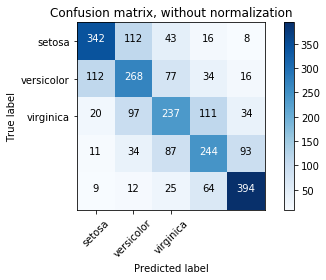

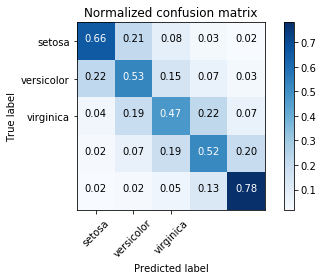

In [66]:
# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# class_names = iris.target_names

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # Run classifier, using a model that is too regularized (C too low) to see
# # the impact on the results
# classifier = svm.SVC(kernel='linear', C=0.01)
# y_pred = classifier.fit(X_train, y_train).predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()